In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [3]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [4]:
rng = np.random.RandomState(42) 
ser = pd.Series(rng.rand(5)) 
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [5]:
ser.sum()

2.811925491708157

In [6]:
ser.mean()

0.5623850983416314

In [7]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)}) 
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [8]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [9]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [10]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [11]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [12]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [13]:
planets.groupby('method')

In [14]:
planets.groupby('method')['orbital_period']

In [15]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [16]:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [17]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

In [18]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6), 'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [19]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [20]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [21]:
def filter_func(x):
    return x['data2'].std() > 4

print(df)
print(df.groupby('key').std())
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [22]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [23]:
def norm_by_data2(x):
    # x是一个分组数据的DataFrame 
    x['data1'] /= x['data2'].sum() 
    return x
print(df)
print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [24]:
import numpy as np
import pandas as pd
titanic = pd.read_csv('Titanic.csv')

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
titanic.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
female,0.742038
male,0.188908


In [27]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [28]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [29]:
age = pd.cut(titanic['Age'], [0, 18, 80]) 
titanic.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [30]:
fare = pd.qcut(titanic['Fare'], 2) 
titanic.pivot_table('Survived', ['Sex', age], [fare, 'Pclass'])

Fare            (-0.001, 14.454]                     (14.454, 512.329]  \
Pclass                         1         2         3                 1   
Sex    Age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

Fare                                 
Pclass                  2         3  
Sex    Age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [31]:
from datetime import datetime
datetime(year=2020, month=1, day=4)

datetime.datetime(2020, 1, 4, 0, 0)

In [32]:
from dateutil import parser
date = parser.parse("4th of January, 2020")
date

datetime.datetime(2020, 1, 4, 0, 0)

In [33]:
date.strftime('%A')

'Saturday'

In [34]:
import numpy as np
date = np.array('2020-01-04', dtype=np.datetime64)
date

array('2020-01-04', dtype='datetime64[D]')

In [35]:
date + np.arange(12)

array(['2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07',
       '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11',
       '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15'],
      dtype='datetime64[D]')

In [36]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [37]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [38]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [39]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [40]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [41]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [42]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [43]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [44]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [45]:
from pandas.tseries.offsets import BDay
pd.date_range('2020-03-13', periods=5, freq=BDay())

DatetimeIndex(['2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19'],
              dtype='datetime64[ns]', freq='B')

In [46]:
ts_index = pd.date_range('2020-3-13',periods =12,freq = 'T')

In [47]:
ts = pd.Series(np.arange(12),index = ts_index)
ts

2020-03-13 00:00:00     0
2020-03-13 00:01:00     1
2020-03-13 00:02:00     2
2020-03-13 00:03:00     3
2020-03-13 00:04:00     4
2020-03-13 00:05:00     5
2020-03-13 00:06:00     6
2020-03-13 00:07:00     7
2020-03-13 00:08:00     8
2020-03-13 00:09:00     9
2020-03-13 00:10:00    10
2020-03-13 00:11:00    11
Freq: T, dtype: int64

In [48]:
ts.resample('5min').sum()

2020-03-13 00:00:00    10
2020-03-13 00:05:00    35
2020-03-13 00:10:00    21
Freq: 5T, dtype: int64

In [49]:
ts.resample('5min',closed='right').sum()

2020-03-12 23:55:00     0
2020-03-13 00:00:00    15
2020-03-13 00:05:00    40
2020-03-13 00:10:00    11
Freq: 5T, dtype: int64

In [50]:
ts.resample('5min',closed='right',label='right').sum()

2020-03-13 00:00:00     0
2020-03-13 00:05:00    15
2020-03-13 00:10:00    40
2020-03-13 00:15:00    11
Freq: 5T, dtype: int64

In [51]:
frame = pd.DataFrame(np.random.randn(2, 4), 
                     index=pd.date_range('1/3/2020', periods=2, freq='W-WED'),
                     columns=['A', 'B', 'C', 'D'])#freq='W-WED'表示每周三
frame

,A,B,C,D
2020-01-08,0.646511,0.392958,0.757902,0.322124
2020-01-15,-0.966820,0.942172,0.683504,1.319075


In [52]:
df_daily = frame.resample('D').asfreq()
df_daily

,A,B,C,D
2020-01-08,0.646511,0.392958,0.757902,0.322124
2020-01-09,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN
2020-01-11,NaN,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN
2020-01-15,-0.966820,0.942172,0.683504,1.319075


In [53]:
frame.resample('D').ffill()

,A,B,C,D
2020-01-08,0.646511,0.392958,0.757902,0.322124
2020-01-09,0.646511,0.392958,0.757902,0.322124
2020-01-10,0.646511,0.392958,0.757902,0.322124
2020-01-11,0.646511,0.392958,0.757902,0.322124
2020-01-12,0.646511,0.392958,0.757902,0.322124
2020-01-13,0.646511,0.392958,0.757902,0.322124
2020-01-14,0.646511,0.392958,0.757902,0.322124
2020-01-15,-0.966820,0.942172,0.683504,1.319075


In [54]:
frame.resample('D').bfill()

,A,B,C,D
2020-01-08,0.646511,0.392958,0.757902,0.322124
2020-01-09,-0.966820,0.942172,0.683504,1.319075
2020-01-10,-0.966820,0.942172,0.683504,1.319075
2020-01-11,-0.966820,0.942172,0.683504,1.319075
2020-01-12,-0.966820,0.942172,0.683504,1.319075
2020-01-13,-0.966820,0.942172,0.683504,1.319075
2020-01-14,-0.966820,0.942172,0.683504,1.319075
2020-01-15,-0.966820,0.942172,0.683504,1.319075


In [55]:
frame.resample('D').ffill(limit=2)

,A,B,C,D
2020-01-08,0.646511,0.392958,0.757902,0.322124
2020-01-09,0.646511,0.392958,0.757902,0.322124
2020-01-10,0.646511,0.392958,0.757902,0.322124
2020-01-11,NaN,NaN,NaN,NaN
2020-01-12,NaN,NaN,NaN,NaN
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,NaN,NaN,NaN,NaN
2020-01-15,-0.966820,0.942172,0.683504,1.319075


In [56]:
frame.resample('W-THU').ffill()

,A,B,C,D
2020-01-09,0.646511,0.392958,0.757902,0.322124
2020-01-16,-0.966820,0.942172,0.683504,1.319075


In [57]:
times = pd.date_range('2018-08-3 00:00', freq='1min', periods=10)
df2 = pd.DataFrame({'time': times.repeat(3),
                    'key': np.tile(['a', 'b', 'c'], 10),
                    'value': np.arange(30)})
df2[:10]

,time,key,value
0,2018-08-03 00:00:00,a,0
1,2018-08-03 00:00:00,b,1
2,2018-08-03 00:00:00,c,2
3,2018-08-03 00:01:00,a,3
4,2018-08-03 00:01:00,b,4
5,2018-08-03 00:01:00,c,5
6,2018-08-03 00:02:00,a,6
7,2018-08-03 00:02:00,b,7
8,2018-08-03 00:02:00,c,8
9,2018-08-03 00:03:00,a,9


In [58]:
df2.groupby(['key',pd.Grouper(key='time',freq='5min')]).sum()

value
key time                      
a   2018-08-03 00:00:00     30
    2018-08-03 00:05:00    105
b   2018-08-03 00:00:00     35
    2018-08-03 00:05:00    110
c   2018-08-03 00:00:00     40
    2018-08-03 00:05:00    115

In [59]:
index = pd.date_range('1/3/2020', periods=4, freq='T')
series = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s':series})
df

,s
2020-01-03 00:00:00,0.0
2020-01-03 00:01:00,NaN
2020-01-03 00:02:00,2.0
2020-01-03 00:03:00,3.0


In [60]:
df.asfreq(freq='30S')

,s
2020-01-03 00:00:00,0.0
2020-01-03 00:00:30,NaN
2020-01-03 00:01:00,NaN
2020-01-03 00:01:30,NaN
2020-01-03 00:02:00,2.0
2020-01-03 00:02:30,NaN
2020-01-03 00:03:00,3.0


In [61]:
df.asfreq(freq='2min')

,s
2020-01-03 00:00:00,0.0
2020-01-03 00:02:00,2.0


In [62]:
ts_index = pd.date_range('2020-3-13',periods =5,freq = 'T')
ts = pd.Series(np.arange(5),index = ts_index)
ts

2020-03-13 00:00:00    0
2020-03-13 00:01:00    1
2020-03-13 00:02:00    2
2020-03-13 00:03:00    3
2020-03-13 00:04:00    4
Freq: T, dtype: int64

In [63]:
ts.shift(5,freq='T')

2020-03-13 00:05:00    0
2020-03-13 00:06:00    1
2020-03-13 00:07:00    2
2020-03-13 00:08:00    3
2020-03-13 00:09:00    4
Freq: T, dtype: int64

In [64]:
ts.shift(1)

2020-03-13 00:00:00    NaN
2020-03-13 00:01:00    0.0
2020-03-13 00:02:00    1.0
2020-03-13 00:03:00    2.0
2020-03-13 00:04:00    3.0
Freq: T, dtype: float64

In [65]:
ts.tshift(1)

2020-03-13 00:01:00    0
2020-03-13 00:02:00    1
2020-03-13 00:03:00    2
2020-03-13 00:04:00    3
2020-03-13 00:05:00    4
Freq: T, dtype: int64

In [66]:
index = pd.date_range('2020-3-13',periods =5,freq = 'T')
ts = pd.DataFrame(np.arange(len(index)),index=index,columns=['data'])
ts

,data
2020-03-13 00:00:00,0
2020-03-13 00:01:00,1
2020-03-13 00:02:00,2
2020-03-13 00:03:00,3
2020-03-13 00:04:00,4


In [67]:
ts['sum'] = ts.data.rolling(3).sum()
ts['mean1'] = ts.data.rolling(3).mean()
ts['mean2'] = ts.data.rolling(3,min_periods=2).mean()
ts['mean3'] = ts.data.rolling(3,center=True,min_periods=2).mean()

In [68]:
ts

,data,sum,mean1,mean2,mean3
2020-03-13 00:00:00,0,NaN,NaN,NaN,0.5
2020-03-13 00:01:00,1,NaN,NaN,0.5,1.0
2020-03-13 00:02:00,2,3.0,1.0,1.0,2.0
2020-03-13 00:03:00,3,6.0,2.0,2.0,3.0
2020-03-13 00:04:00,4,9.0,3.0,3.0,3.5


In [69]:
#conda install -c anaconda pandas-datareader
from pandas_datareader import data
google = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [70]:
google = google['Close']

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

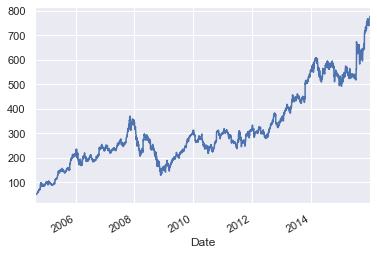

In [72]:
google.plot()

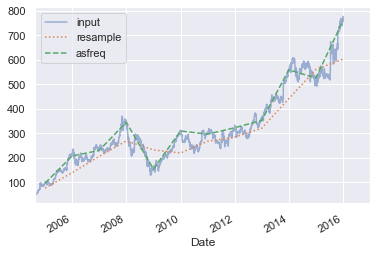

In [73]:
google.plot(alpha=0.5, style='-')
google.resample('BA').mean().plot(style=':') 
google.asfreq('BA').plot(style='--') 
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

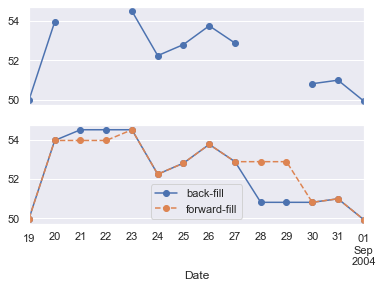

In [74]:
fig, ax = plt.subplots(2, sharex=True) 
data = google.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

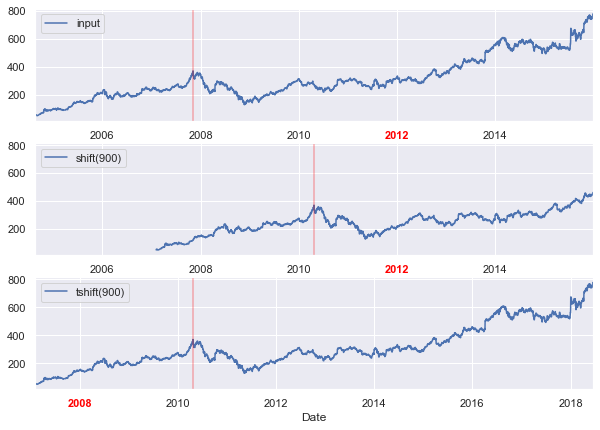

In [75]:
fig, ax = plt.subplots(3, figsize=(10,7), sharey=True)
# 对数据应用时间频率，用向后填充解决缺失值 
google = google.asfreq('D', method='pad')
google.plot(ax=ax[0]) 
google.shift(900).plot(ax=ax[1]) 
google.tshift(900).plot(ax=ax[2])
# 设置图例与标签 
local_max = pd.to_datetime('2007-11-05') 
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2) 
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2) 
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

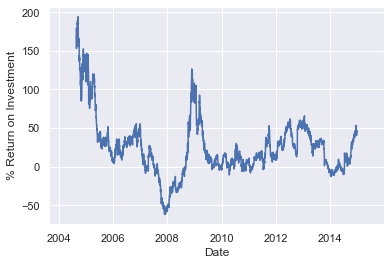

In [76]:
ROI = 100 * (google.tshift(-365) / google - 1) 
ROI.plot() 
plt.ylabel('% Return on Investment');

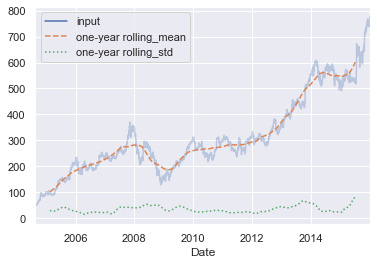

In [77]:
rolling = google.rolling(365, center=True)
data = pd.DataFrame({'input': google, 
                     'one-year rolling_mean': rolling.mean(), 
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])

ax.lines[0].set_alpha(0.3)

In [78]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True) 
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [79]:
data.columns = ['East', 'West'] 
data['Total'] = data.eval('West + East')

In [80]:
data.dropna().describe()

,East,West,Total
count,64238.000000,64238.000000,64238.000000
mean,52.153959,61.756172,113.910131
std,67.179748,90.507860,145.289364
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,74.000000,148.000000
max,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle Count')

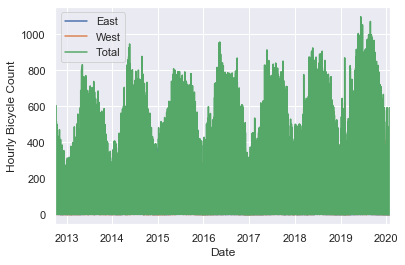

In [81]:
%matplotlib inline 
import seaborn

seaborn.set()

data.plot() 
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Weekly bicycle count')

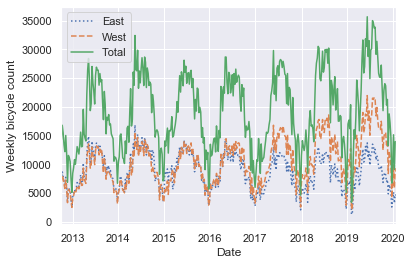

In [82]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean of 30 days count')

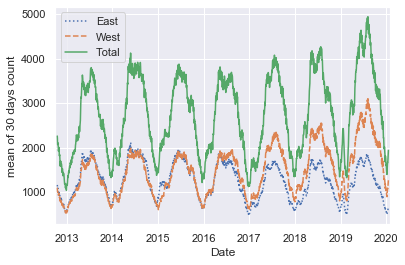

In [83]:
daily = data.resample('D').sum() 
daily.rolling(30, center=True).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean of 30 days count')

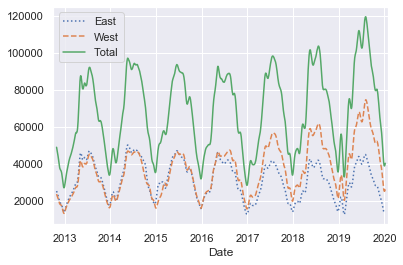

In [84]:
daily.rolling(50, center=True, 
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

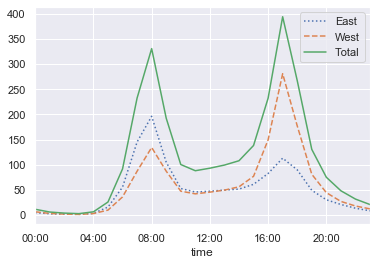

In [85]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) 
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

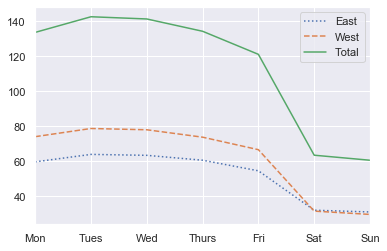

In [86]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [87]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend') 
by_time = data.groupby([weekend, data.index.time]).mean()

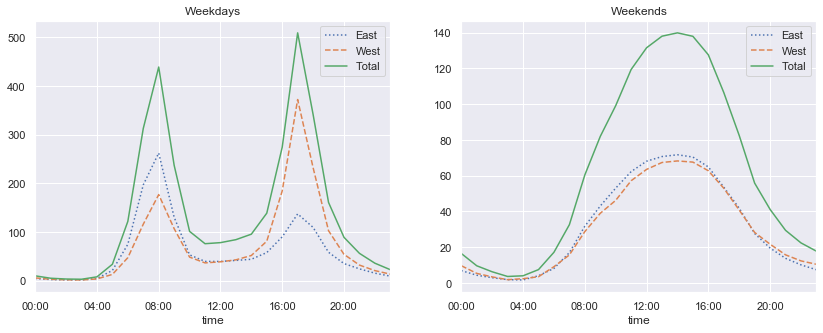

In [88]:
import matplotlib.pyplot as plt 
import sys

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])

by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

In [89]:
s = pd.Series(['Tom','William Rick','John','Albert',np.nan,'1234','SteveMinsu'])
print(s.str.lower())

0             tom
1    william rick
2            john
3          albert
4             NaN
5            1234
6      steveminsu
dtype: object


In [90]:
s = pd.Series(['Tom','William Rick','John','Albert',np.nan,'1234','SteveMinsu'])
print(s.str.upper())

0             TOM
1    WILLIAM RICK
2            JOHN
3          ALBERT
4             NaN
5            1234
6      STEVEMINSU
dtype: object


In [91]:
s = pd.Series(['Tom','William Rick','John','Albert',np.nan,'1234','SteveMinsu'])
print(s.str.len())

0     3.0
1    12.0
2     4.0
3     6.0
4     NaN
5     4.0
6    10.0
dtype: float64


In [92]:
s = pd.Series(['Tom','William Rick','John','Albert'])
print(s)
print("========== After Stripping ==========")
print(s.str.strip())

0             Tom
1    William Rick
2            John
3          Albert
dtype: object
========== After Stripping ==========
0             Tom
1    William Rick
2            John
3          Albert
dtype: object


In [93]:
s = pd.Series(['Tom','William Rick','John','Albert'])
print(s)
print("========== Split Pattern ==========")
print(s.str.split(' '))

0             Tom
1    William Rick
2            John
3          Albert
dtype: object
========== Split Pattern ==========
0              [Tom]
1    [William, Rick]
2             [John]
3           [Albert]
dtype: object


In [94]:
s = pd.Series(['Tom','William Rick','John','Albert'])
print(s.str.cat(sep=' <=>'))

Tom <=>William Rick <=>John <=>Albert


In [95]:
s = pd.Series(['Tom','William Rick','John','Albert'])
print(s.str.get_dummies())

   Albert  John  Tom  William Rick
0       0     0    1             0
1       0     0    0             1
2       0     1    0             0
3       1     0    0             0


In [96]:
s = pd.Series(['Tom','William Rick','John','Albert'])
print(s.str.contains(' '))

0    False
1     True
2    False
3    False
dtype: bool


In [97]:
s = pd.Series(['Tom','William Rick','John','Albe@t'])
print(s)
print("After replaceing @ with r :")
print(s.str.replace('@','r'))

0             Tom
1    William Rick
2            John
3          Albe@t
dtype: object
After replaceing @ with r :
0             Tom
1    William Rick
2            John
3          Albert
dtype: object


In [98]:
s = pd.Series(['Tom','William Rick','John','Albe@t'])
print(s.str.repeat(2))

0                      TomTom
1    William RickWilliam Rick
2                    JohnJohn
3                Albe@tAlbe@t
dtype: object


###  recipeitems.json的下载方法参考
###  https://www.cnblogs.com/lyjun/p/10899064.html 或 https://github.com/fictivekin/openrecipes/issues/218

In [99]:
try:
    recipes = pd.read_json('recipeitems.json') 
except ValueError as e:
    print("ValueError:", e)

ValueError: Trailing data


In [100]:
with open('recipeitems.json') as f: 
    line = f.readline() 
pd.read_json(line).shape

(2, 12)

In [101]:
# 将文件内容读取成Python数组
with open('recipeitems.json', 'r') as f:
    # 提取每一行内容 
    data = (line.strip() for line in f) 
    # 将所有内容合并成一个列表 
    data_json = "[{0}]".format(','.join(data)) 
# 用JSON形式读取数据 r
recipes = pd.read_json(data_json)

In [102]:
recipes.shape

(173278, 17)

In [103]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [104]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [105]:
recipes.ingredients.head()

0    Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
1    12 whole Dinner Rolls Or Small Sandwich Buns (...
2    Dressing:\n1 tablespoon cumin seeds\n1/3 cup /...
3    Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
4    For each bowl: \na big dollop of Greek yogurt\...
Name: ingredients, dtype: object

In [107]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [108]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [109]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [110]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

In [111]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [112]:
import re 
spice_df = pd.DataFrame( 
    dict((spice, recipes.ingredients.str.contains(spice, re.IGNORECASE)) for spice in spice_list)) 
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [113]:
selection = spice_df.query('parsley & paprika & tarragon') 
len(selection)

10

In [114]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

In [115]:
purchase_1 = pd.Series({'Name':'Tom',
                        'Item':'Flower',
                        'Cost': 23.5})
purchase_2 = pd.Series({'Name':'Lily',
                        'Item':'Dog',
                        'Cost': 30.5})
purchase_3 = pd.Series({'Name':'Bob',
                        'Item':'Cat',
                        'Cost': 27.5})
df = pd.DataFrame([purchase_1,purchase_2,purchase_3],
                  index=['Store1','Store2','Store3'])
df.to_csv('1.csv',index=False)

In [116]:
df

,Name,Item,Cost
Store1,Tom,Flower,23.5
Store2,Lily,Dog,30.5
Store3,Bob,Cat,27.5


In [117]:
a = pd.read_csv('1.csv')
a

,Name,Item,Cost
0,Tom,Flower,23.5
1,Lily,Dog,30.5
2,Bob,Cat,27.5


In [118]:
# 不指定分隔符
b = pd.read_table('1.csv')
b

,"Name,Item,Cost"
0,"Tom,Flower,23.5"
1,"Lily,Dog,30.5"
2,"Bob,Cat,27.5"


In [119]:
# 用参数sep指定分隔符
c = pd.read_table('1.csv',sep=',')
c

,Name,Item,Cost
0,Tom,Flower,23.5
1,Lily,Dog,30.5
2,Bob,Cat,27.5


In [120]:
df = pd.DataFrame([['Tom',98],['Alice',76],['Lucy',88]])
df.to_csv('2.csv',index=False)
df

,0,1
0,Tom,98
1,Alice,76
2,Lucy,88


In [121]:
l = pd.read_csv('2.csv', header=None)
l

,0,1
0,0,1
1,Tom,98
2,Alice,76
3,Lucy,88


In [122]:
l = pd.read_csv('2.csv', names=['Name','Score'])
l

,Name,Score
0,0,1
1,Tom,98
2,Alice,76
3,Lucy,88


In [123]:
a = pd.read_csv("2.csv", nrows = 2)
a

,0,1
0,Tom,98
1,Alice,76
